In [73]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("tb_xray_dataset.csv")

**BASIC DATASET INFORMATIONS**

In [74]:
df.head(10)

Patient_ID  Age  Gender Chest_Pain  Cough_Severity  Breathlessness  Fatigue  \
0  PID000001   69    Male        Yes               1               2        3   
1  PID000002   32  Female        Yes               3               0        9   
2  PID000003   89    Male         No               7               0        3   
3  PID000004   78  Female        Yes               2               0        6   
4  PID000005   38    Male         No               7               2        5   
5  PID000006   41  Female        Yes               1               3        7   
6  PID000007   20    Male        Yes               0               1        0   
7  PID000008   39    Male        Yes               5               0        9   
8  PID000009   70    Male        Yes               7               0        1   
9  PID000010   19  Female         No               8               2        1   

   Weight_Loss     Fever Night_Sweats Sputum_Production Blood_in_Sputum  \
0         2.37  Moderate          Yes            Medium             Yes   
1         6.09  Moderate           No            Medium              No   
2         2.86      Mild          Yes            Medium              No   
3         4.57  Moderate           No              High             Yes   
4        13.86      High          Yes               Low              No   
5         2.23      Mild           No               Low             Yes   
6         7.11  Moderate          Yes               Low              No   
7         9.91      High          Yes              High              No   
8        13.77  Moderate          Yes            Medium              No   
9        13.85  Moderate          Yes              High              No   

  Smoking_History Previous_TB_History         Class  
0          Former                 Yes        Normal  
1         Current                 Yes        Normal  
2         Current                  No  Tuberculosis  
3           Never                 Yes  Tuberculosis  
4           Never                 Yes  Tuberculosis  
5         Current                  No        Normal  
6           Never                 Yes        Normal  
7           Never                  No        Normal  
8           Never                  No  Tuberculosis  
9          Former                  No  Tuberculosis

In [75]:
df_refit= df.drop(columns=['Patient_ID'], inplace=True)

In [76]:
df.head(10)

Age  Gender Chest_Pain  Cough_Severity  Breathlessness  Fatigue  \
0   69    Male        Yes               1               2        3   
1   32  Female        Yes               3               0        9   
2   89    Male         No               7               0        3   
3   78  Female        Yes               2               0        6   
4   38    Male         No               7               2        5   
5   41  Female        Yes               1               3        7   
6   20    Male        Yes               0               1        0   
7   39    Male        Yes               5               0        9   
8   70    Male        Yes               7               0        1   
9   19  Female         No               8               2        1   

   Weight_Loss     Fever Night_Sweats Sputum_Production Blood_in_Sputum  \
0         2.37  Moderate          Yes            Medium             Yes   
1         6.09  Moderate           No            Medium              No   
2         2.86      Mild          Yes            Medium              No   
3         4.57  Moderate           No              High             Yes   
4        13.86      High          Yes               Low              No   
5         2.23      Mild           No               Low             Yes   
6         7.11  Moderate          Yes               Low              No   
7         9.91      High          Yes              High              No   
8        13.77  Moderate          Yes            Medium              No   
9        13.85  Moderate          Yes              High              No   

  Smoking_History Previous_TB_History         Class  
0          Former                 Yes        Normal  
1         Current                 Yes        Normal  
2         Current                  No  Tuberculosis  
3           Never                 Yes  Tuberculosis  
4           Never                 Yes  Tuberculosis  
5         Current                  No        Normal  
6           Never                 Yes        Normal  
7           Never                  No        Normal  
8           Never                  No  Tuberculosis  
9          Former                  No  Tuberculosis

In [77]:
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  20000 non-null  int64  
 1   Gender               20000 non-null  object 
 2   Chest_Pain           20000 non-null  object 
 3   Cough_Severity       20000 non-null  int64  
 4   Breathlessness       20000 non-null  int64  
 5   Fatigue              20000 non-null  int64  
 6   Weight_Loss          20000 non-null  float64
 7   Fever                20000 non-null  object 
 8   Night_Sweats         20000 non-null  object 
 9   Sputum_Production    20000 non-null  object 
 10  Blood_in_Sputum      20000 non-null  object 
 11  Smoking_History      20000 non-null  object 
 12  Previous_TB_History  20000 non-null  object 
 13  Class                20000 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 2.1+ MB


In [78]:
df.shape

(20000, 14)

In [79]:
df.describe()

Age  Cough_Severity  Breathlessness       Fatigue  \
count  20000.000000    20000.000000    20000.000000  20000.000000   
mean      53.467450        4.491350        2.003450      4.508450   
std       20.773984        2.864723        1.417123      2.881552   
min       18.000000        0.000000        0.000000      0.000000   
25%       35.000000        2.000000        1.000000      2.000000   
50%       53.000000        4.000000        2.000000      5.000000   
75%       71.000000        7.000000        3.000000      7.000000   
max       89.000000        9.000000        4.000000      9.000000   

        Weight_Loss  
count  20000.000000  
mean       7.455280  
std        4.339864  
min        0.000000  
25%        3.640000  
50%        7.490000  
75%       11.200000  
max       15.000000

In [80]:
df.isna().sum()

Age                    0
Gender                 0
Chest_Pain             0
Cough_Severity         0
Breathlessness         0
Fatigue                0
Weight_Loss            0
Fever                  0
Night_Sweats           0
Sputum_Production      0
Blood_in_Sputum        0
Smoking_History        0
Previous_TB_History    0
Class                  0
dtype: int64

<br>

**Age Distribution in the dataset**

<Axes: xlabel='Age', ylabel='Count'>

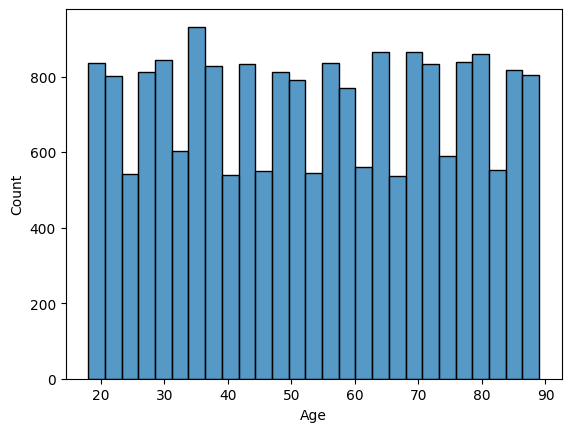

In [81]:
sns.histplot(df['Age'])

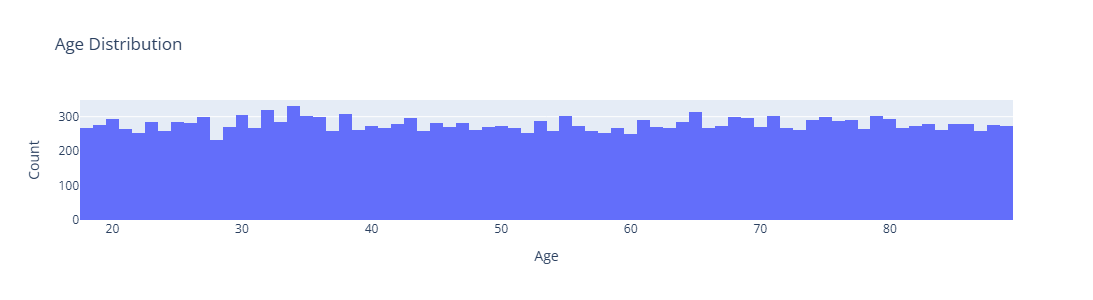

In [147]:

fig = px.histogram(df, x="Age", title="Age Distribution")
fig.update_layout(
    width=600,
    height=300,      # Shorter height
    xaxis_title="Age",
    yaxis_title="Count"
)
fig.show()

**Gender Ratio in the dataset**

<Axes: ylabel='count'>

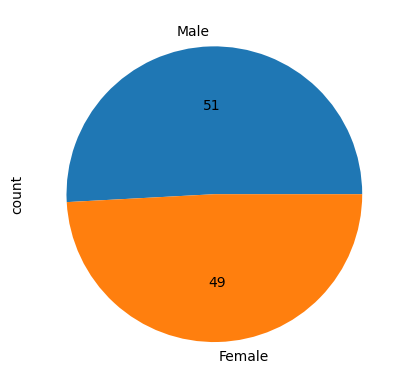

In [83]:
df['Gender'].value_counts().plot.pie(autopct='%1.0f')

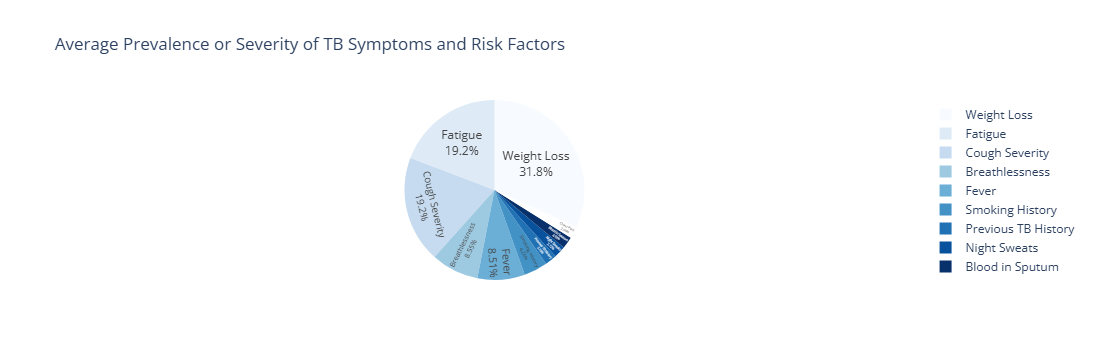

In [122]:
import pandas as pd
import plotly.express as px

df["Chest_Pain_Num"] = df["Chest_Pain"].map({"Yes": 1, "No": 0})
df["Night_Sweats_Num"] = df["Night_Sweats"].map({"Yes": 1, "No": 0})
df["Blood_in_Sputum_Num"] = df["Blood_in_Sputum"].map({"Yes": 1, "No": 0})
df["Smoking_History_Num"] = df["Smoking_History"].map({"Never": 0, "Former": 1, "Current": 2})
df["Previous_TB_History_Num"] = df["Previous_TB_History"].map({"No": 0, "Yes": 1})
df["Fever_Num"] = df["Fever"].map({"Mild": 1, "Moderate": 2, "High": 3})

symptom_means = {
    "Chest Pain": df["Chest_Pain_Num"].mean(),
    "Cough Severity": df["Cough_Severity"].mean(),
    "Breathlessness": df["Breathlessness"].mean(),
    "Fatigue": df["Fatigue"].mean(),
    "Weight Loss": df["Weight_Loss"].mean(),
    "Fever": df["Fever_Num"].mean(),
    "Night Sweats": df["Night_Sweats_Num"].mean(),
    "Blood in Sputum": df["Blood_in_Sputum_Num"].mean(),
    "Smoking History": df["Smoking_History_Num"].mean(),
    "Previous TB History": df["Previous_TB_History_Num"].mean()
}

pie_df = pd.DataFrame({
    "Symptom": list(symptom_means.keys()),
    "Mean Value": list(symptom_means.values())
})

fig = px.pie(
    pie_df,
    names="Symptom",
    values="Mean Value",
    title="Average Prevalence or Severity of TB Symptoms and Risk Factors",
    color_discrete_sequence=px.colors.sequential.Blues
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


**Tb positive vs negative distribution in the dataset**

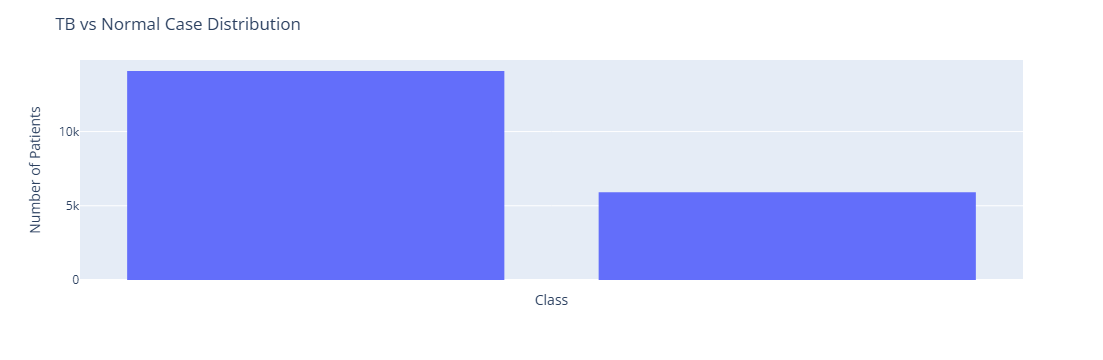

In [84]:
import plotly.express as px

# Replace df with your actual DataFrame
fig = px.histogram(
    df, 
    x="Class", 
    category_orders={"Class": [0, 1]},
)
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Normal', 'Tuberculosis']
    ),
    title="TB vs Normal Case Distribution",
    yaxis_title="Number of Patients",
    xaxis_title="Class"
)
fig.show()


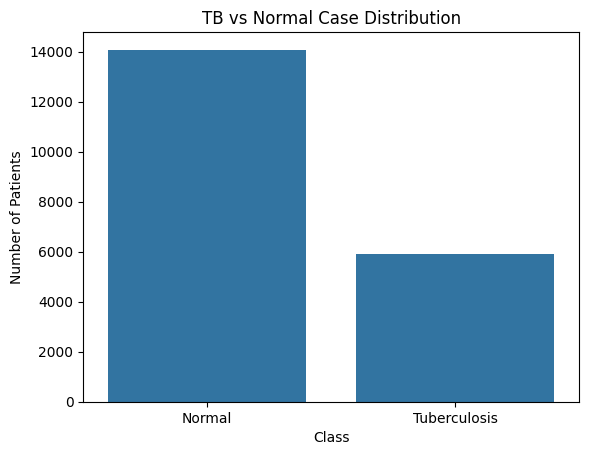

In [85]:
sns.countplot(data=df, x="Class")
plt.xticks(ticks=[0, 1], labels=["Normal", "Tuberculosis"])
plt.title("TB vs Normal Case Distribution")
plt.ylabel("Number of Patients")
plt.xlabel("Class")
plt.show()

**DETAILED ANALYSIS**

**Analytics and Conclusion drawn by studying the dataset**

<Axes: xlabel='Age', ylabel='Count'>

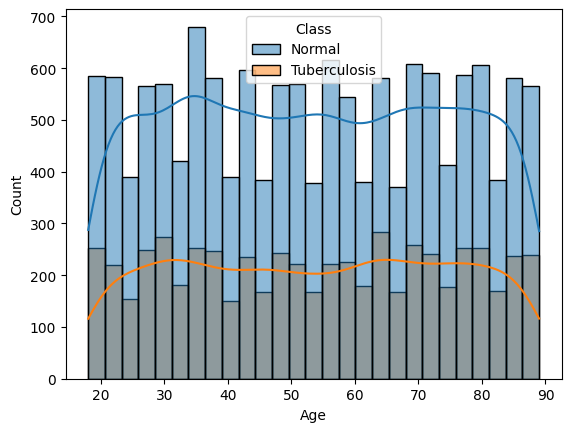

In [86]:
sns.histplot(data=df, x="Age", hue="Class", kde=True)

**Normal cases outnumber TB cases across all ages:**

<li>At every age bin, Normal class (blue) counts are significantly higher than TB (orange).
<li>TB is relatively less prevalent across all age groups.

**TB cases are evenly distributed across ages:**

<li>The orange TB distribution remains fairly flat from ages 20 to 80.
<li>There's no specific age group with a spike in TB prevalence — suggesting age is not a strong standalone indicator for TB here.

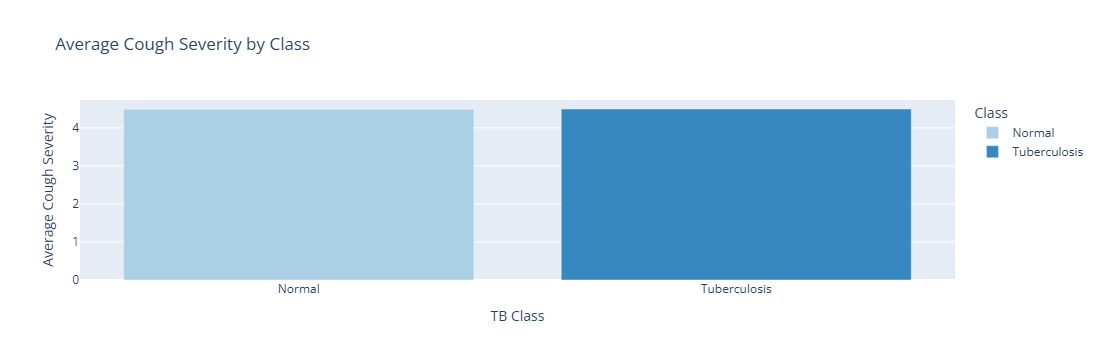

In [87]:
blue_shades = ["#abd0e6", "#3787c0"]
cough_vs_class = df.groupby('Class')['Cough_Severity'].mean().reset_index()

fig = px.bar(
    cough_vs_class,
    x='Class',
    y='Cough_Severity',
    color='Class',
    color_discrete_sequence=blue_shades,
    title="Average Cough Severity by Class"
)

fig.update_layout(
    xaxis_title="TB Class",
    yaxis_title="Average Cough Severity",
    legend_title="Class",
    legend=dict(
        x=1.02,
        y=1,
        xanchor='left',
        yanchor='top'
    )
)
fig.show()

**Implication for diagnosis:**

<li>Cough severity, while important, cannot be used alone to predict or classify TB.
<li>It should be combined with other features (e.g., imaging, lab tests, multiple symptoms) for better diagnostic accuracy.

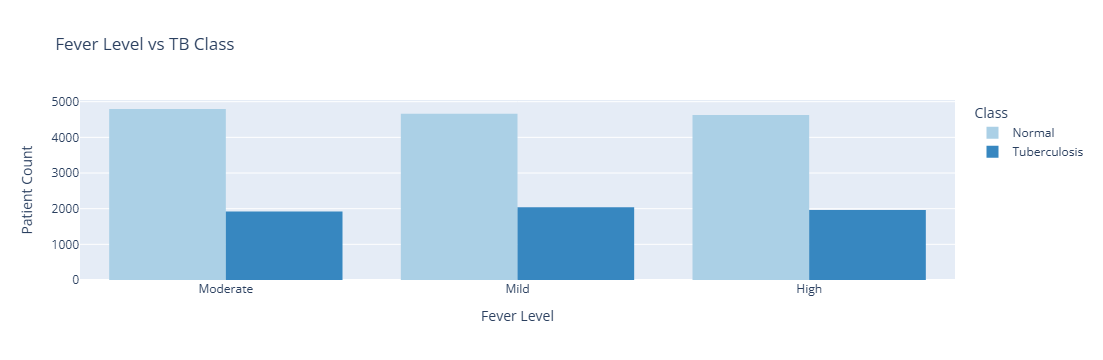

In [88]:
blue_shades = ["#abd0e6", "#3787c0"]
fig = px.histogram(
    df, 
    x='Fever', 
    color='Class', 
    barmode='group', 
    color_discrete_sequence=blue_shades,
    title="Fever Level vs TB Class"
)

fig.update_layout(
    xaxis_title="Fever Level",
    yaxis_title="Patient Count",
    legend_title="Class",
    legend=dict(
        x=1.02,
        y=1,
        xanchor='left',
        yanchor='top'
    )
)
fig.show()


**TB cases are slightly higher in Mild fever:**

<li>Among the three fever levels, the Mild category has the highest number of TB cases, followed by High and then Moderate.
<li>This might be counterintuitive, as one might expect higher TB cases at high fever levels. It suggests fever intensity alone may not predict TB reliably.

**Normal patients are high in all categories:**

<li>The Normal class dominates in every fever category, meaning many people experience fevers without having TB.
<li>This emphasizes that fever is a non-specific symptom — common even in non-TB cases.

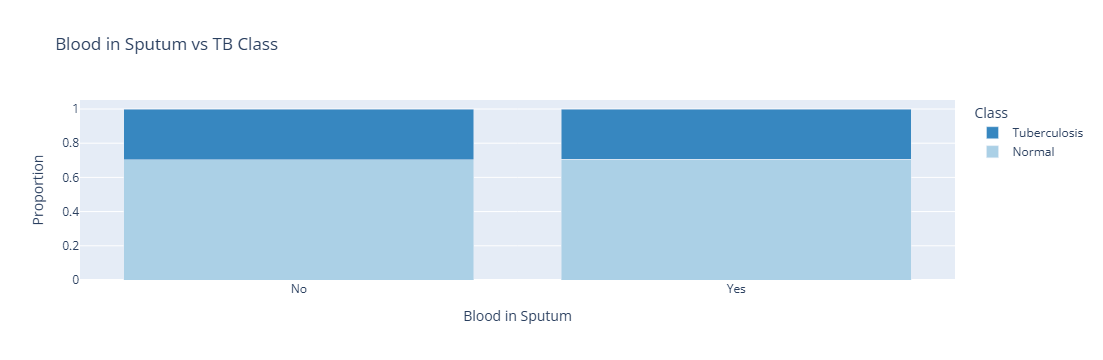

In [89]:
import plotly.graph_objects as go

blue_shades = ["#abd0e6", "#3787c0"]

fig = go.Figure()

for i, col in enumerate(blood_tb_ct.columns):
    fig.add_bar(
        x=blood_tb_ct.index,
        y=blood_tb_ct[col],
        name=str(col),
        marker_color=blue_shades[i]
    )

fig.update_layout(
    barmode='stack',
    title="Blood in Sputum vs TB Class",
    xaxis_title="Blood in Sputum",
    yaxis_title="Proportion",
    legend_title="Class",
    legend=dict(
        x=1.02,
        y=1,
        xanchor='left',
        yanchor='top'
    )
)
fig.show()


**Blood in sputum is not a strong distinguishing factor by itself for TB:**

Blood Sputum level alone doesn't show a significant change in TB proportion.

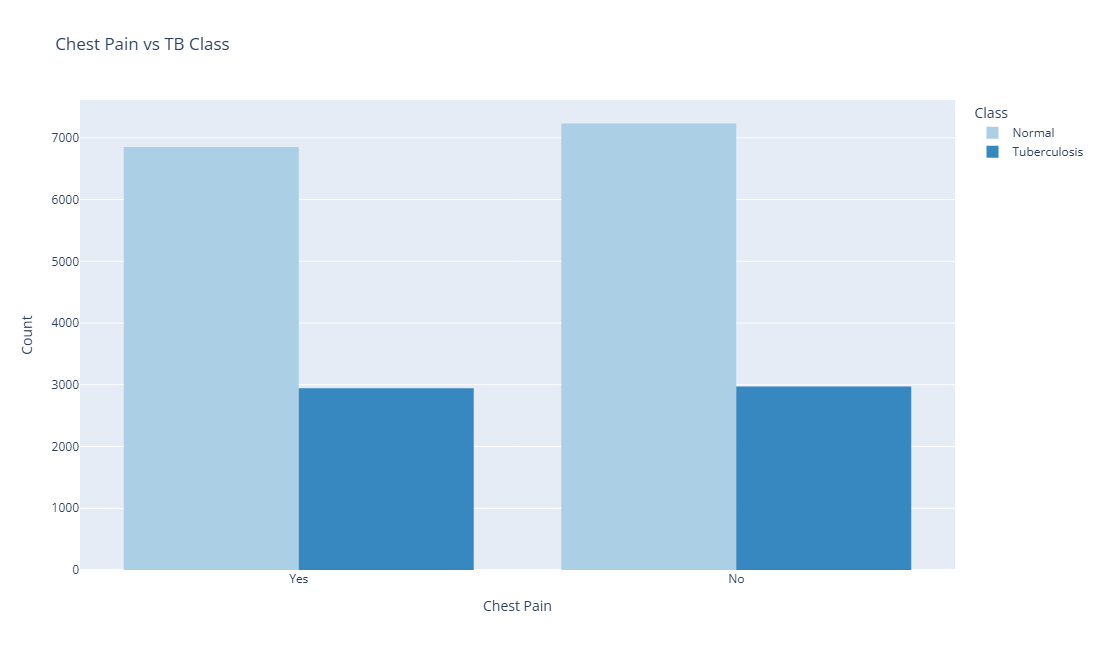

In [90]:
blue_shades = ["#abd0e6", "#3787c0"]
fig = px.histogram(
    df, 
    x='Chest_Pain', 
    color='Class', 
    barmode='group', 
    color_discrete_sequence=blue_shades,
    title="Chest Pain vs TB Class"
)

fig.update_layout(
    xaxis_title="Chest Pain",
    yaxis_title="Count",
    legend_title="Class",
    legend=dict(
        x=1.02,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    height=650
)
fig.show()

**Tuberculosis patients are almost equally split between chest pain and no chest pain:**

<li>The blue bars (TB class) are almost the same height for both Yes and No.
<li>Thus chest pain is not a strong differentiator for TB.

**Normal patients are more likely to report no chest pain:**

The red bar for Normal/No Chest Pain is slightly taller than for Yes, suggesting chest pain is slightly less common in Normal cases.

**Most patients in general don’t have TB:**

<li>In both chest pain groups, Normal cases greatly outnumber TB cases.
<li>This reinforces the idea that chest pain alone is not a reliable TB indicator, given how many non-TB patients also report it.

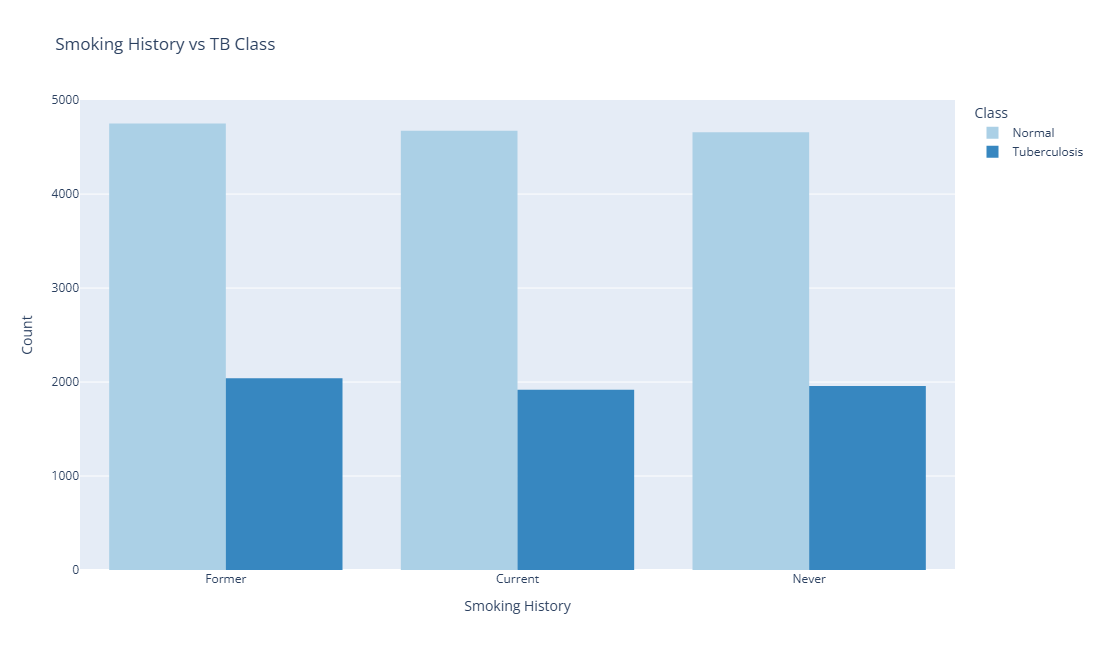

In [91]:
blue_shades = ["#abd0e6", "#3787c0"]
fig = px.histogram(
    df, 
    x='Smoking_History', 
    color='Class', 
    barmode='group', 
    color_discrete_sequence=blue_shades,
    title="Smoking History vs TB Class"
)

fig.update_layout(
    xaxis_title="Smoking History",
    yaxis_title="Count",
    legend_title="Class",
    legend=dict(
        x=1.02,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    height=650
)
fig.show()

**Higher number of TB cases among smokers**

<li>Former and Current smokers show a slightly higher count of TB cases than Never smokers.

<li>While the Normal class is higher in all groups, the proportion of TB cases is marginally greater in smokers.

**TB affects all groups similarly**

<li>There is no extremely sharp difference in TB case count across the three categories.
<li>This suggests that while smoking might be a mild risk factor, TB isn't exclusive to any one smoking group.

**Slightly more TB in former smokers than current or never:**

Among the three categories, former smokers show the highest count of TB cases, which might suggest a lingering impact of past smoking on TB vulnerability.

In [92]:
blue_shades = ["#abd0e6", "#3787c0"]
fig = px.box(
    df,
    x='Class',
    y='Fatigue',
    color='Class',
    color_discrete_sequence=blue_shades,
    title="Fatigue vs TB Class"
)

fig.update_layout(
    xaxis_title="TB Class",
    yaxis_title="Fatigue",
    legend_title="Class",
    legend=dict(
        x=1.02,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    height=650
)
fig.show()

**Median fatigue is higher in Normal patients:**

<li>The median (middle line in the box) for Normal is slightly higher (~5) than for TB patients (~4).
<li>This is unexpected, as fatigue is commonly associated with TB.

**Can we determine whether one has Tuberculosis by fever levels?**

Among the three fever levels, the Mild category has the highest number of TB cases, followed by High and then Moderate. This might be counterintuitive, as one might expect higher TB cases at high fever levels. It suggests fever intensity alone may not predict TB reliably.

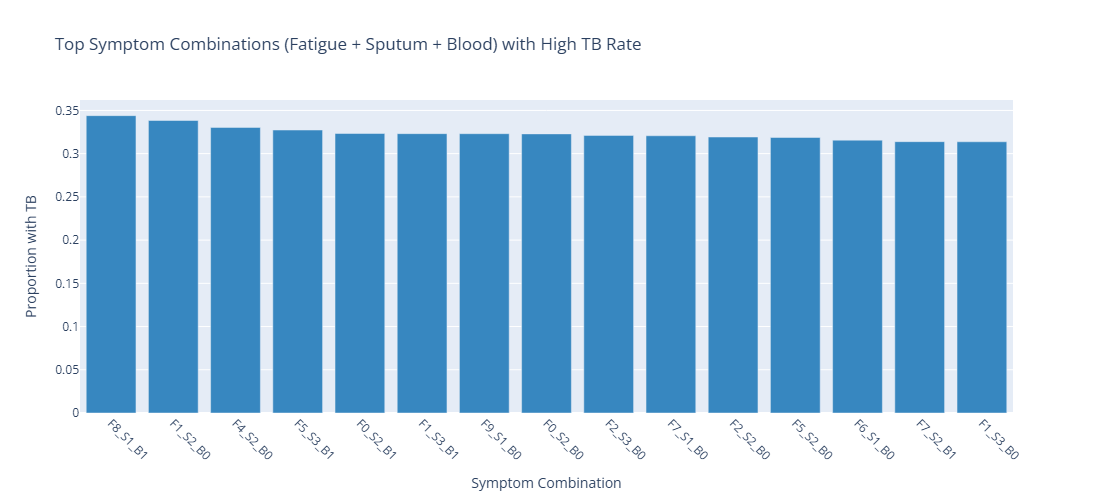

In [97]:
import plotly.express as px

df["Blood_in_Sputum_Num"] = df["Blood_in_Sputum"].map({"No": 0, "Yes": 1})
df["Sputum_Production_Num"] = df["Sputum_Production"].map({"Low": 1, "Medium": 2, "High": 3})
df["Class_Num"] = df["Class"].map({"Normal": 0, "Tuberculosis": 1})

df["Symptom_Combination"] = (
    "F" + df["Fatigue"].astype(str) +
    "_S" + df["Sputum_Production_Num"].astype(str) +
    "_B" + df["Blood_in_Sputum_Num"].astype(str)
)

combo_tb_rate = (
    df.groupby("Symptom_Combination")["Class_Num"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
)

fig = px.bar(
    combo_tb_rate,
    x="Symptom_Combination",
    y="Class_Num",
    color_discrete_sequence=["#3787c0"],
    title="Top Symptom Combinations (Fatigue + Sputum + Blood) with High TB Rate"
)

fig.update_layout(
    xaxis_title="Symptom Combination",
    yaxis_title="Proportion with TB",
    legend_title_text="",
    xaxis_tickangle=45,
    height=500
)
fig.show()

**Does the absence of blood in sputum (B0) still indicate a TB risk?**

Several combinations with B0 are present in the top ranks, though they tend to have slightly lower TB proportions compared to those with B1, indicating that TB can occur without blood in sputum, though with a lower likelihood among these combinations.

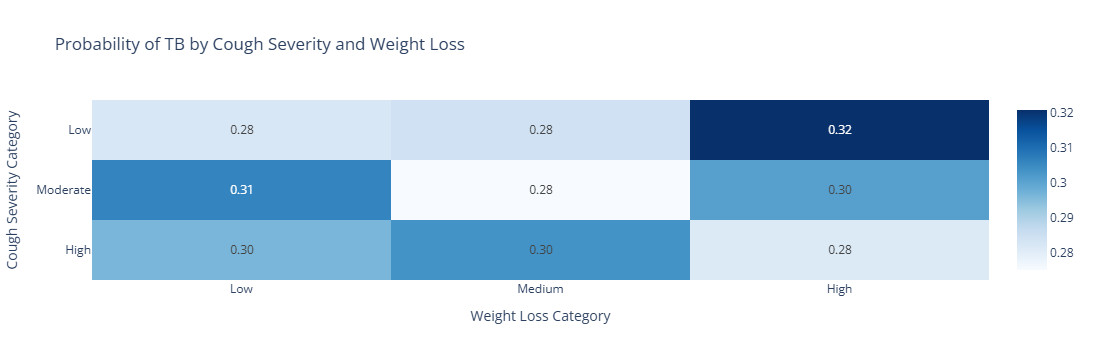

In [106]:
import pandas as pd
import plotly.express as px

df["Cough_Bin"] = pd.cut(df["Cough_Severity"], bins=[0, 2, 5, 8], labels=["Low", "Moderate", "High"])
df["Weight_Bin"] = pd.cut(df["Weight_Loss"], bins=[0, 5, 10, 20], labels=["Low", "Medium", "High"])
df["Class_Num"] = df["Class"].map({"Normal": 0, "Tuberculosis": 1})

heat_data = df.pivot_table(
    values="Class_Num",
    index="Cough_Bin",
    columns="Weight_Bin",
    aggfunc="mean",
    observed=False
)

fig = px.imshow(
    heat_data,
    text_auto=".2f",
    color_continuous_scale="Blues",
    aspect="square",
    title="Probability of TB by Cough Severity and Weight Loss"
)
fig.update_layout(
    xaxis_title="Weight Loss Category",
    yaxis_title="Cough Severity Category"
)
fig.show()


**High probability of TB even with low cough if weight loss is high:**

<li>The highest TB probability (0.32) is observed in the Low Cough + High Weight Loss group.
<li>This suggests that severe weight loss alone may be a strong indicator of TB.
<li>Cough severity does not need to be high for TB probability to be elevated.

**Weight loss is more influential than cough severity:**

<li>TB probability increases more consistently with higher weight loss than with increasing cough severity.
<li>For example, TB probability drops to 0.28 in the High Cough + High Weight Loss group, which is lower than the Low Cough + High Weight Loss group (0.32).
<li>Moderate weight loss results in stable or lower probabilities regardless of cough level.

**Presence of blood in sputum strongly linked to higher TB rates**

<li>The combination F8_S1_B1 has the highest TB proportion (just above 0.33).
<li>Most of the top combinations with B1 (blood present) show higher TB proportions.
<li>This suggests blood in sputum is a strong indicator of TB risk.

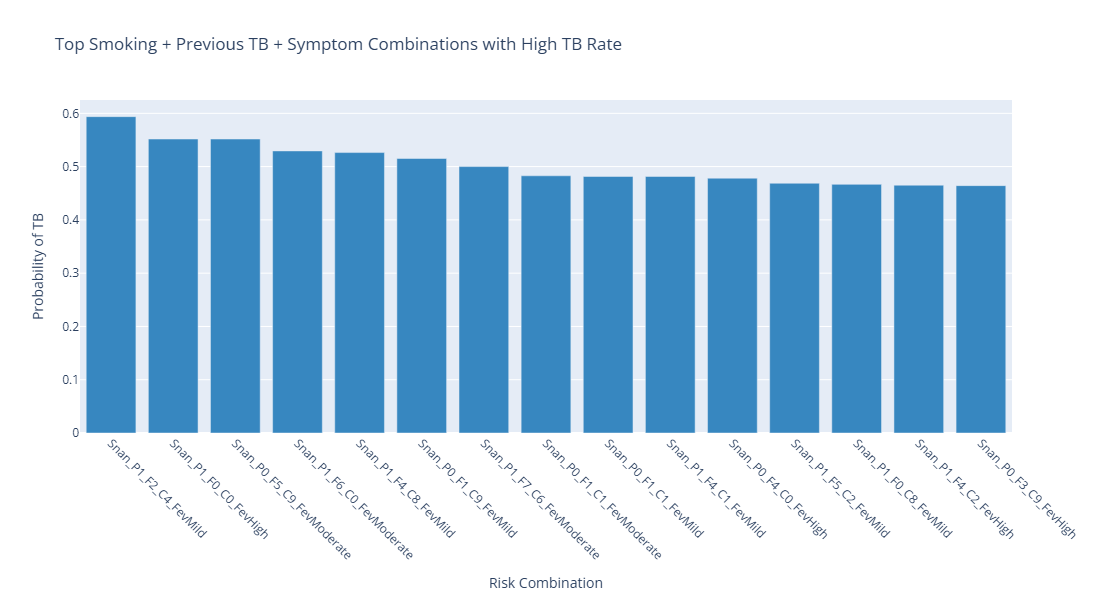

In [107]:
import plotly.express as px

df["Smoking_Num"] = df["Smoking_History"].map({"No": 0, "Yes": 1})
df["Previously_Treated_for_TB_Num"] = df["Previous_TB_History"].map({"No": 0, "Yes": 1})
df["Class_Num"] = df["Class"].map({"Normal": 0, "Tuberculosis": 1})

df["RiskCombo"] = (
    "S" + df["Smoking_Num"].astype(str) +
    "_P" + df["Previously_Treated_for_TB_Num"].astype(str) +
    "_F" + df["Fatigue"].astype(str) +
    "_C" + df["Cough_Severity"].astype(str) +
    "_Fev" + df["Fever"].astype(str)
)

tb_risk_combo = (
    df.groupby("RiskCombo")["Class_Num"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
)

fig = px.bar(
    tb_risk_combo,
    x="RiskCombo",
    y="Class_Num",
    color_discrete_sequence=["#3787c0"],
    title="Top Smoking + Previous TB + Symptom Combinations with High TB Rate",
    height=600
)

fig.update_layout(
    xaxis_title="Risk Combination",
    yaxis_title="Probability of TB",
    legend_title_text="",
    xaxis_tickangle=45
)
fig.show()

**Previous TB history combined with current smoking increases TB risk**

<li>The highest probability (~0.59) is found in Snan_P1_F2_C4_FewMild, indicating:
<ul>Non-smoker</ul>
<ul>Previous TB present</ul>
<ul>Moderate fatigue and cough</ul>
</li>
<li>Many top combinations involve P1 (Previous TB = Yes), reinforcing its strong association with TB.
<li>Prior TB seems to strongly predispose individuals to recurrent TB, especially when paired with other mild-to-moderate symptoms.

**Mild or moderate fatigue levels appear frequently in high-risk profiles**

<li>Mild and Moderate Fever combinations consistently appear in high-risk groups.

<li>Suggests that even non-severe fatigue, when combined with previous TB or specific smoking/cough profiles, contributes to elevated TB risk.

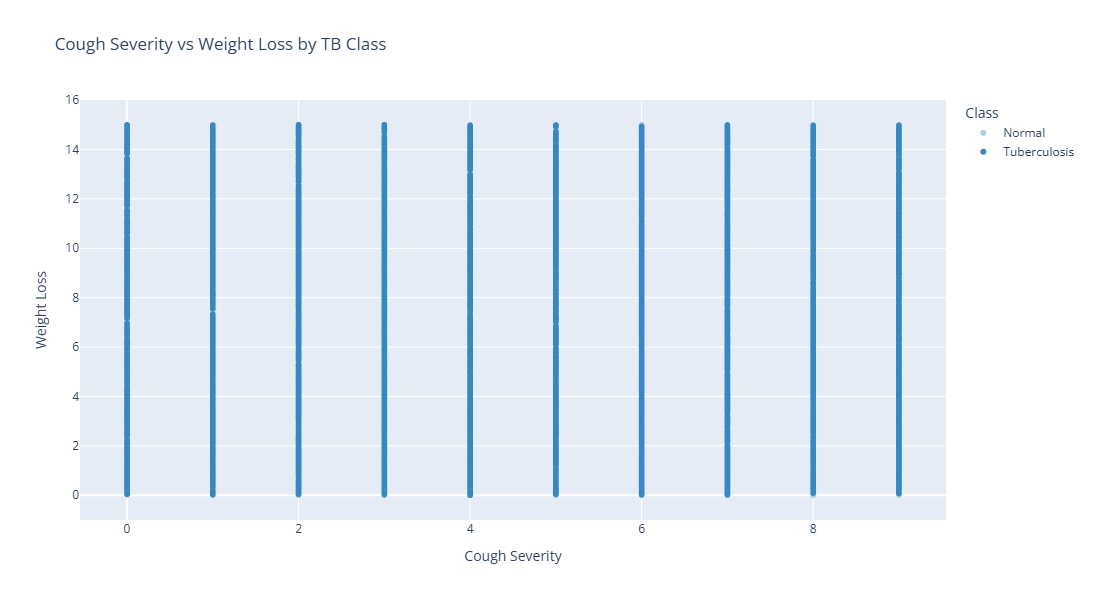

In [110]:
import plotly.express as px

fig = px.scatter(
    df,
    x="Cough_Severity",
    y="Weight_Loss",
    color="Class",
    title="Cough Severity vs Weight Loss by TB Class",
    color_discrete_sequence=["#abd0e6", "#3787c0"]
)
fig.update_layout(
    xaxis_title="Cough Severity",
    yaxis_title="Weight Loss",
    legend_title="Class",
    legend=dict(
        x=1.02,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    height=600
)
fig.show()

**Clustering pattern:**

<li>TB cases (orange) seem to appear slightly more frequently at higher weight loss levels, even though they are fewer in total.
<li>This hints that higher weight loss may be somewhat associated with TB.

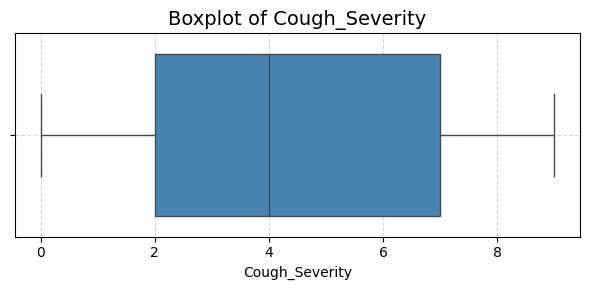

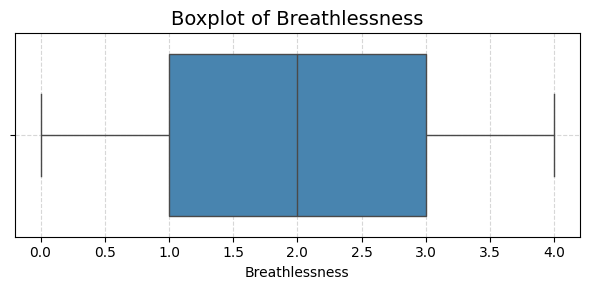

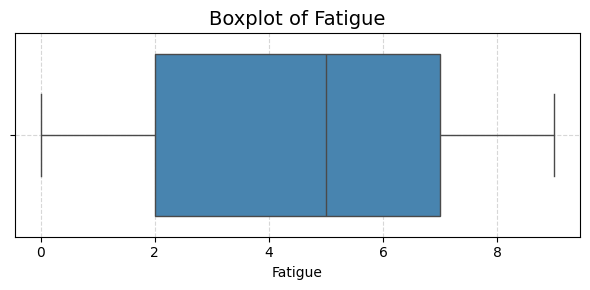

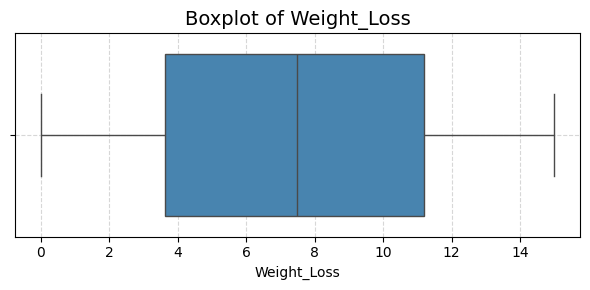

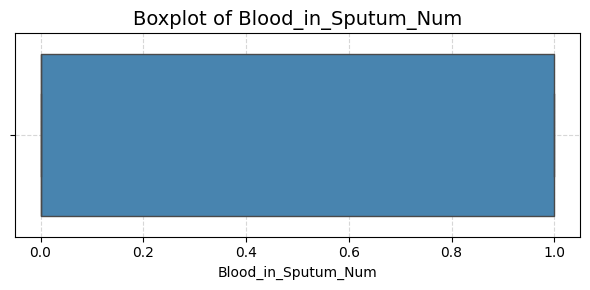

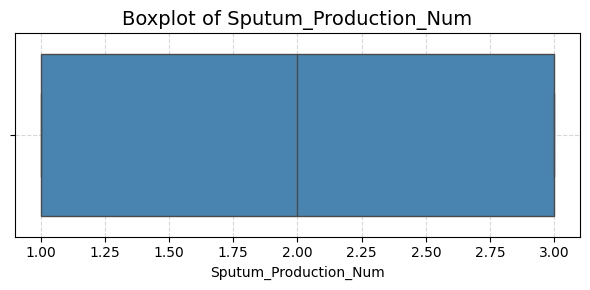

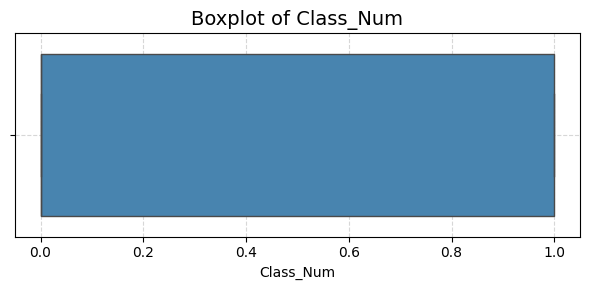

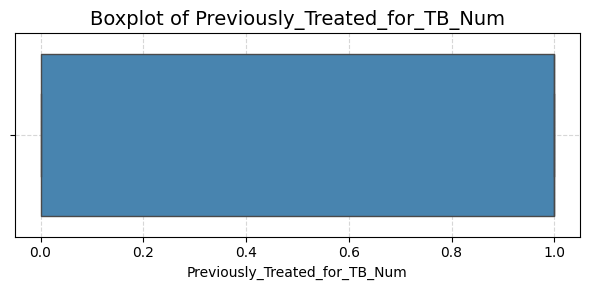

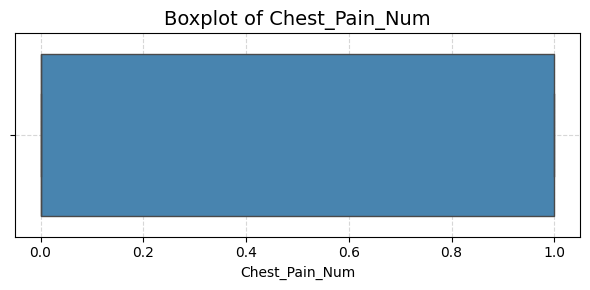

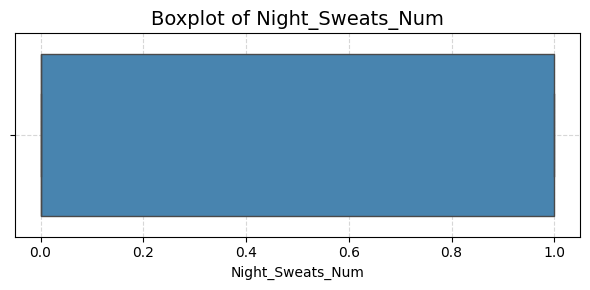

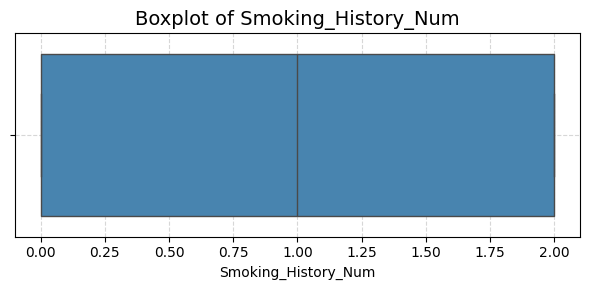

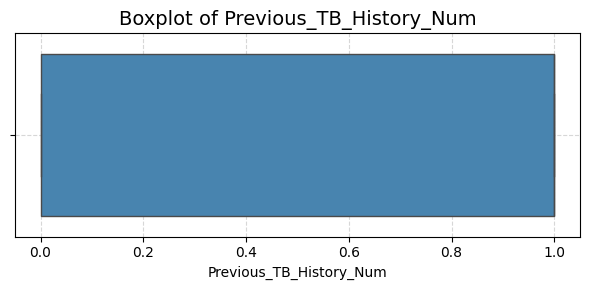

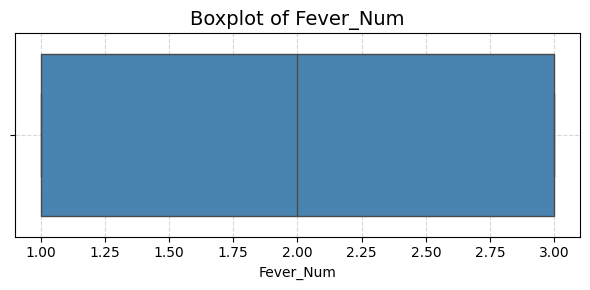

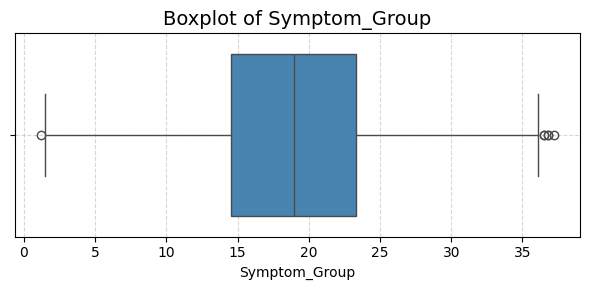

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

exclude_cols = ["Age", "Sputum_Production"]
numeric_cols = [col for col in df.select_dtypes(include=["int64", "float64"]).columns if col not in exclude_cols]

for col in numeric_cols:
    if df[col].dropna().shape[0] == 0:
        continue

    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x=col, color='#3787c0')
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.xlabel(col)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [140]:
df["Chest_Pain_Num"] = df["Chest_Pain"].map({"Yes": 1, "No": 0})
df["Symptom_Group_Score"] = (
    df["Chest_Pain_Num"]
    + df["Cough_Severity"]
    + df["Breathlessness"]
    + df["Fatigue"]
    + df["Weight_Loss"]
)


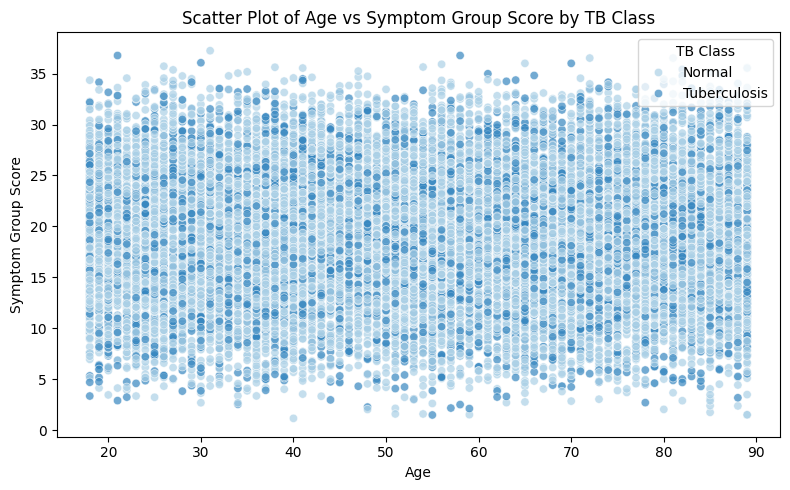

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="Age",
    y="Symptom_Group_Score",  # Assumes you previously computed Symptom_Group_Score as the sum of key symptoms
    hue="Class",
    palette=["#abd0e6", "#3787c0"],
    alpha=0.7
)
plt.title("Scatter Plot of Age vs Symptom Group Score by TB Class")
plt.xlabel("Age")
plt.ylabel("Symptom Group Score")
plt.legend(title="TB Class")
plt.tight_layout()
plt.show()

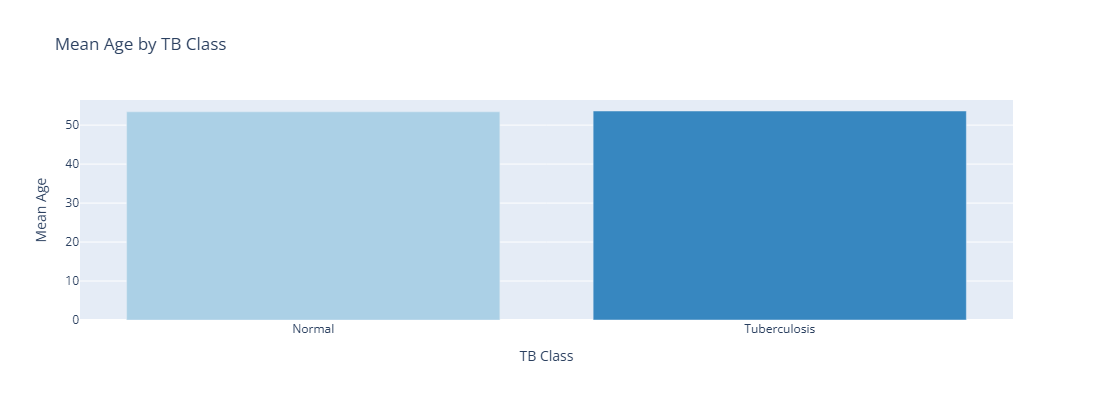

In [164]:
import plotly.express as px

fig = px.bar(
    df.groupby("Class", as_index=False)["Age"].mean(),
    x="Class",
    y="Age",
    color="Class",
    color_discrete_sequence=["#abd0e6", "#3787c0"],
    title="Mean Age by TB Class"
)
fig.update_layout(
    xaxis_title="TB Class",
    yaxis_title="Mean Age",
    showlegend=False,
    height=400
)
fig.show()

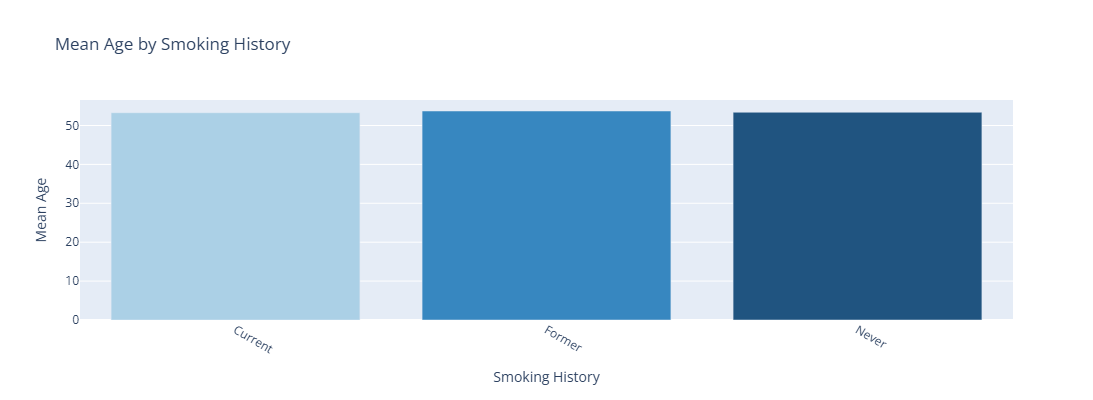

In [187]:
import plotly.express as px

blue_shades = ["#abd0e6", "#3787c0", "#205480"]
mean_age = df.groupby("Smoking_History", as_index=False)["Age"].mean()

fig = px.bar(
    mean_age,
    x="Smoking_History",
    y="Age",
    color="Smoking_History",
    color_discrete_sequence=blue_shades,
    title="Mean Age by Smoking History"
)
fig.update_layout(
    xaxis_title="Smoking History",
    yaxis_title="Mean Age",
    showlegend=False,
    xaxis_tickangle=30,
    height=400
)
fig.show()


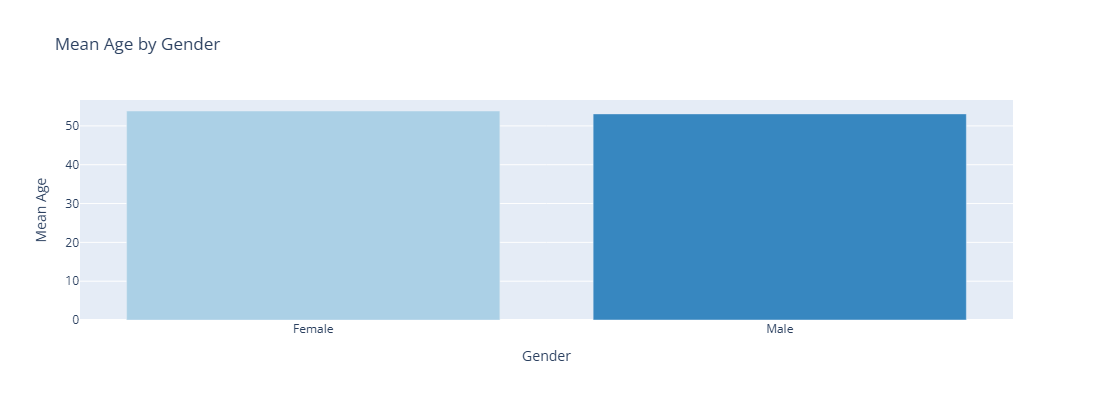

In [168]:
import plotly.express as px

mean_age = df.groupby("Gender", as_index=False)["Age"].mean()

fig = px.bar(
    mean_age,
    x="Gender",
    y="Age",
    color="Gender",
    color_discrete_sequence=["#abd0e6", "#3787c0"],
    title="Mean Age by Gender"
)
fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Mean Age",
    showlegend=False,
    height=400
)
fig.show()


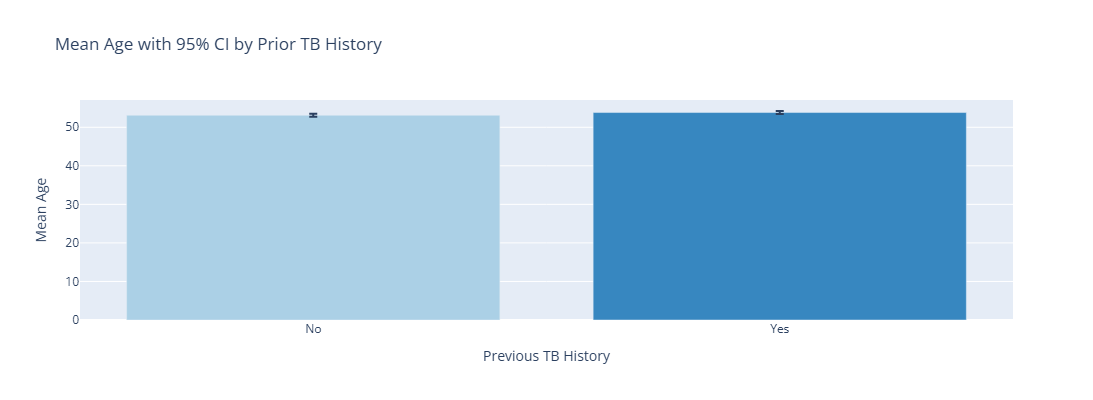

In [169]:
import plotly.express as px

age_tb_history = df.groupby("Previous_TB_History", as_index=False)["Age"].mean()

fig = px.bar(
    age_tb_history,
    x="Previous_TB_History",
    y="Age",
    color="Previous_TB_History",
    color_discrete_sequence=["#abd0e6", "#3787c0"],
    error_y=df.groupby("Previous_TB_History")["Age"].sem() * 1.96,
    title="Mean Age with 95% CI by Prior TB History"
)
fig.update_layout(
    xaxis_title="Previous TB History",
    yaxis_title="Mean Age",
    showlegend=False,
    height=400
)
fig.show()

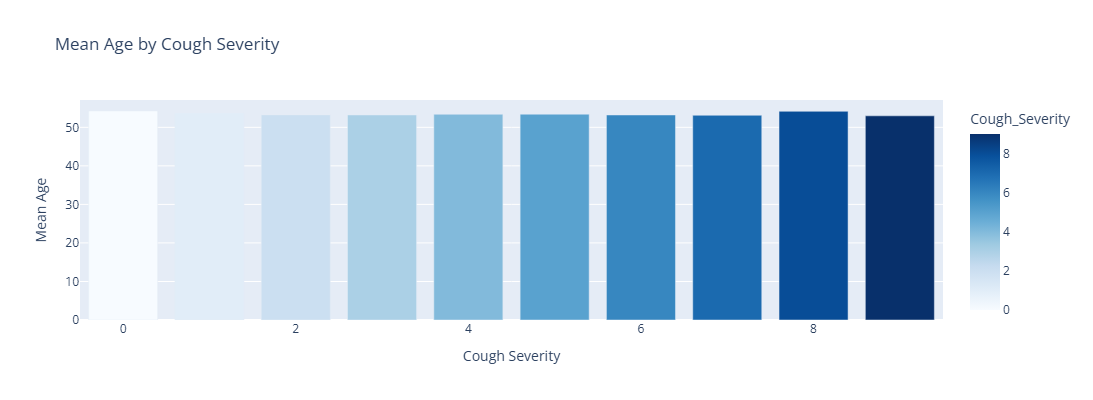

In [172]:
import plotly.express as px

age_by_cough = df.groupby("Cough_Severity", as_index=False)["Age"].mean()

fig = px.bar(
    age_by_cough,
    x="Cough_Severity",
    y="Age",
    color="Cough_Severity",
    color_continuous_scale=px.colors.sequential.Blues,
    title="Mean Age by Cough Severity"
)
fig.update_layout(
    xaxis_title="Cough Severity",
    yaxis_title="Mean Age",
    showlegend=False,
    height=400
)
fig.show()

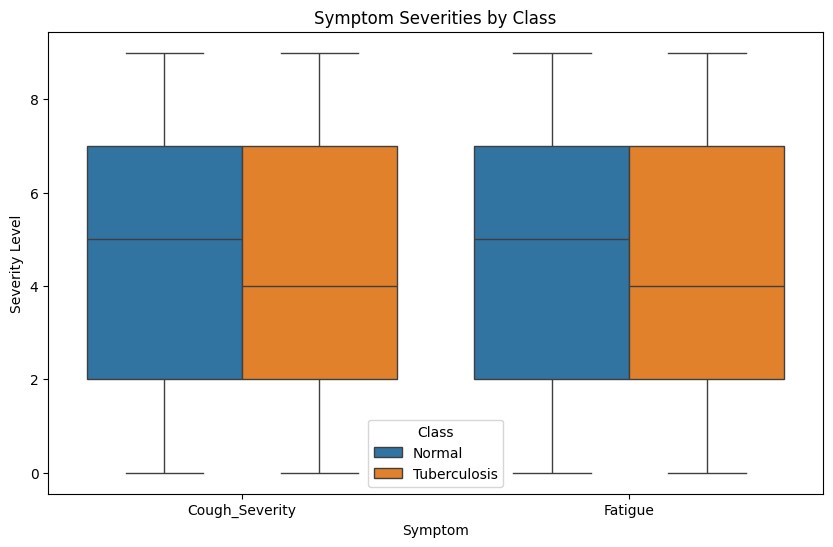

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('tb_xray_dataset.csv')

# Melt the data for multiple symptoms
symptoms = df.melt(id_vars='Class', value_vars=['Cough_Severity', 'Fatigue'], var_name='Symptom', value_name='Severity')

# Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=symptoms, x='Symptom', y='Severity', hue='Class')
plt.title('Symptom Severities by Class')
plt.ylabel('Severity Level')
plt.show()
